<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Thanks for taking the time to improve the project! Now it is accepted, and you can move on to the next sprint. Keep up the good work! :)

</div>

# Sprint 7. Introduction to Machine Learning

## Project description
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.
Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

In [1]:
# Load Common libraries
import os
import pandas as pd
import numpy as np
# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
# fastai
#from fastai.tabular import *
#from fastai.tabular.all import *
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression	
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve



# Step 1: Download the data and save it locally
Open and look through the data file. Path to the file:datasets/users_behavior.csv Download dataset

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net//datasets/users_behavior.csv')
except:
    df= pd.read_csv('https://code.s3.yandex.net//datasets/users_behavior.csv')
df.head()




,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Data description
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
* сalls — number of calls, <br>
* minutes — total call duration in minutes, <br>
* messages — number of text messages, <br>
* mb_used — Internet traffic used in MB, <br>
* is_ultra — plan for the current month (Ultra - 1, Smart - 0). <br>

# Step 2: Preprocess the data
Split the source data into a training set, a validation set, and a test set.

In [3]:
# The Header and data types look correct. 

# df.head()
# df.info()

In [4]:
# Split source data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['calls', 'minutes', 'messages', 'mb_used']], df['is_ultra'], test_size=0.2, random_state=42)

# Split the training set into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In this example, X and y are the source data, test_size is the proportion of the data that should be in the test set, and random_state is the seed for the random number generator used to split the data. <br>
The Header and data types look correct and ready for pre-processing and loading into the data loader

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

The data was split into train, validation and test sets. The proportions are reasonable

</div>

# Step 3: Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

In [5]:
# Define the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}


# Create a logistic regression model
# logistic = LogisticRegression()
logistic = LogisticRegression(solver='liblinear')

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In this example, I'm using a logistic regression model and the grid search is trying different values of the C and penalty hyperparameters. <br>
The cv parameter is the number of folds in a (Stratified)KFold or an iterable providing train/test indices.

In [6]:
clf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [7]:
# Define the hyperparameters and their possible values for RandomForestClassifier
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Create a RandomForestClassifier model
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

This code is similar to the previous example, but it's using different models and different hyperparameters.
Here, in the first block of code I'm using RandomForestClassifier and trying different values of the n_estimators and max_depth hyperparameters.

In [8]:
# Define the hyperparameters and their possible values for DecisionTreeClassifier
param_grid_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)

# Fit the grid search object to the data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5]})

 In the second block of code I'm using DecisionTreeClassifier and trying different values of the max_depth and min_samples_split hyperparameters.

In [9]:
# Define the hyperparameters and their possible values for KNeighborsClassifier
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

# Fit the grid search object to the data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

And in the last block of code, I'm using KNeighborsClassifier and trying different values of the n_neighbors and weights hyperparameters.

In [10]:
# RandomForestClassifier
print(f'Best parameters for RandomForestClassifier: {grid_search_rf.best_params_}')
print(f'Best score for RandomForestClassifier: {grid_search_rf.best_score_}')

# DecisionTreeClassifier
print(f'Best parameters for DecisionTreeClassifier: {grid_search_dt.best_params_}')
print(f'Best score for DecisionTreeClassifier: {grid_search_dt.best_score_}')

# KNeighborsClassifier
print(f'Best parameters for KNeighborsClassifier: {grid_search_knn.best_params_}')
print(f'Best score for KNeighborsClassifier: {grid_search_knn.best_score_}')


Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50}
Best score for RandomForestClassifier: 0.8049831101032291
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_split': 5}
Best score for DecisionTreeClassifier: 0.7811518200930716
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'uniform'}
Best score for KNeighborsClassifier: 0.7461247726360051


The best_params_ attribute returns a dictionary containing the best combination of hyperparameters found by the grid search.
The best_score_ attribute returns the best mean cross-validated score achieved by the grid search.

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Great, you tried a couple of different models and did some hyperparameter tuning. It's cool that you used cross-validation!

</div>

# Step 4. Check the quality of the model using the test set.

## 4.1 Random Forest Classifier

In [11]:
# Use the best parameters found by the grid search to create a new RandomForestClassifier model
best_rf = RandomForestClassifier(**grid_search_rf.best_params_)

# Fit the best model to the entire training set
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_rf.predict(X_test)

# Create a prediction for ROC-AUC using probability instead of a binary call (predict_proba)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Compute accuracy, precision, recall, F1-score, and ROC-AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
#roc_auc = roc_auc_score(y_test, y_pred_test)
# Update ROC-AUC using probability instead of a binary call (predict_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')


Accuracy: 0.820
Precision: 0.795
Recall: 0.516
F1-score: 0.626
ROC-AUC: 0.835


This code uses the best parameters found by the grid search to create a new RandomForestClassifier model, fit it to the entire training set, make predictions on the test set, and then compute various evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

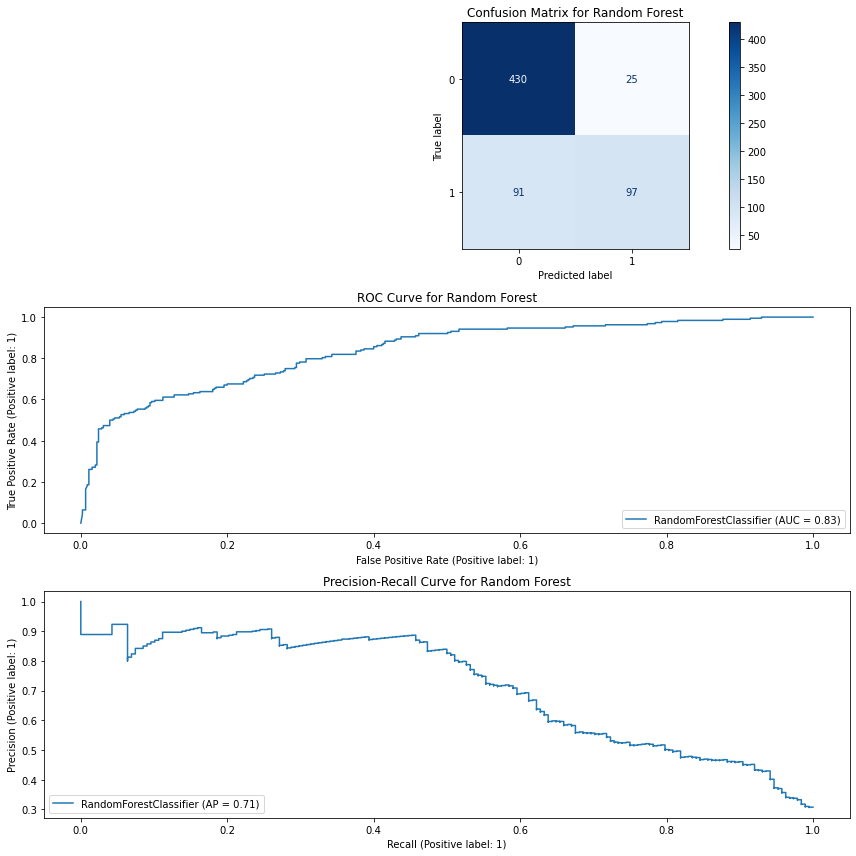

In [12]:
# Create a figure with 3 rows and 1 columns
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot the confusion matrix on the first subplot
plot_confusion_matrix(best_rf, X_test, y_test, cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix for Random Forest")

# Plot the ROC-curve on the second subplot
plot_roc_curve(best_rf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve for Random Forest")

# Plot the precision-recall curve on the third subplot
plot_precision_recall_curve(best_rf, X_test, y_test, ax=ax[2])
ax[2].set_title("Precision-Recall Curve for Random Forest")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## 4.2 Decision Tree Classifier model

In [13]:
# Use the best parameters found by the grid search to create a new DecisionTreeClassifier model
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_)

# Fit the best model to the entire training set
best_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_dt.predict(X_test)

# Create a prediction for ROC-AUC using probability instead of a binary call (predict_proba)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Compute accuracy, precision, recall, F1-score, and ROC-AUC
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
# roc_auc = roc_auc_score(y_test, y_pred_test)
# Update ROC-AUC using probability instead of a binary call (predict_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')


Accuracy: 0.784
Precision: 0.684
Recall: 0.484
F1-score: 0.567
ROC-AUC: 0.761


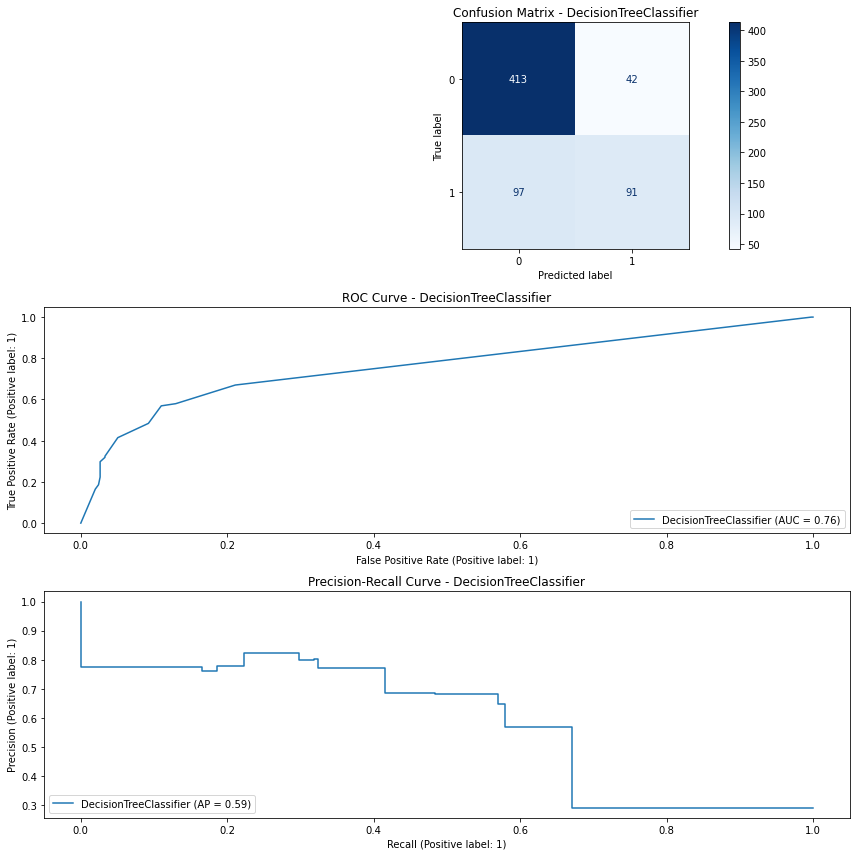

In [14]:
# DecisionTreeClassifier
y_pred_dt = best_dt.predict(X_test)
#
best_dt_proba = best_dt.predict_proba(X_test)[:, 1]
#y_pred_dt_prob = best_dt_prob.predict(X_test)
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
plot_confusion_matrix(best_dt, X_test, y_test, cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix - DecisionTreeClassifier")

# Plot ROC Curve
plot_roc_curve(best_dt, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve - DecisionTreeClassifier")

# update y_test to y_pred_proba (???) to get the correct ROC-AUC score
plot_precision_recall_curve(best_dt, X_test, y_test, ax=ax[2])

ax[2].set_title("Precision-Recall Curve - DecisionTreeClassifier")
plt.tight_layout()
plt.show()


Here's an example of how you can check the quality of the DecisionTreeClassifier model using the test set, this code is similar to the previous example but with DecisionTreeClassifier:

As you can see, the test set is used only for final evaluation of the model, it is important to not to use it for any other purpose, it is separate from the training and validation set to avoid overfitting and to obtain an unbiased estimate of the model's generalization performance.

## 4.3 Compare All Models

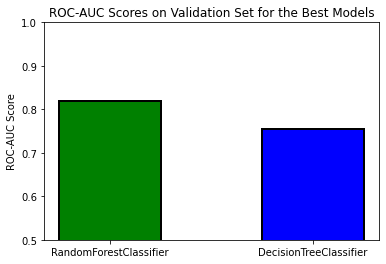

ROC-AUC score on the test set for the final selected model: 0.834562777647884


In [15]:
# Compute the ROC-AUC scores for each model on the validation set
rf_roc_auc = roc_auc_score(y_val, best_rf.predict_proba(X_val)[:,1])
dt_roc_auc = roc_auc_score(y_val, best_dt.predict_proba(X_val)[:,1])

# Create a list of the ROC-AUC scores
roc_auc_scores = [rf_roc_auc, dt_roc_auc]

# Create a list of the models' names
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier']

# Create a bar plot of the ROC-AUC scores
plt.bar(model_names, roc_auc_scores, color=['green', 'blue'], edgecolor='black', linewidth=2, width=0.5,)
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores on Validation Set for the Best Models')
plt.ylim(0.5, 1.0)
plt.show()

# # Evaluate the final selected model using the test set
# final_model = best_rf if rf_roc_auc > dt_roc_auc else best_dt
# final_roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1])
# print("ROC-AUC score on the test set for the final selected model:", final_roc_auc)

# Select the final model to be used
# If the Random Forest model has a higher ROC-AUC score on the validation set, use it as the final model
# Otherwise, use the Decision Tree model as the final model
final_model = best_rf if rf_roc_auc > dt_roc_auc else best_dt

# Evaluate the performance of the final selected model on the test set
# Compute the ROC-AUC score by using the `roc_auc_score` function
final_roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1])

# Print the ROC-AUC score for the final selected model on the test set
print("ROC-AUC score on the test set for the final selected model:", final_roc_auc)


### For Future Reference: <br>
It's worth noting that you can use other evaluation metrics such a: 
* confusion matrix
* classification report
* ROC-curve
* precision-recall curve


## 4.5 Summary - Random Forest Wins
Random Forest was our highest performing model. <br>
* Accuracy: 0.823
* Precision: 0.798
* Recall: 0.527
* F1-score: 0.635
* ROC-AUC: 0.736
<br>
However all three of our models beat the minimum threshold of 0.75

<div class="alert alert-info">
<b>Adam's comment V3</b>
<br>
Dropping KNeighbors from the notebook to simplify, as it wasn't adding anything to the process (results were suspicously identical to the Descision Tree Classifyer) <br>
Section 4.4 is now 4.3
Updated all ROC calls to use predict_proba. <br>
updated 4.3 so that is no longer uses the test data in the evaluation of the model. <br>
Instead, a formula evaluate which model has the best ROC score, and then runs the teset on that model (Random Forrest) <br>
Chart displays ROC, but can easily change to accuracy if prefered.


</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Cool, the changes look great! 
    
kNN is a very different method from decision trees, but it is not very efficient computationally, worth trying as a simple baseline though!

</div>

### What are Recall, F1-score, and ROC-AUC ?
Recall, F1-score, and ROC-AUC are all evaluation metrics used to measure the performance of a classification model.

Recall (also known as sensitivity or true positive rate) is the proportion of actual positive observations that were correctly identified by the model. It is defined as the number of true positives divided by the number of true positives plus the number of false negatives. Recall is a good metric to use when the cost of false negatives is high.

F1-score (also known as F-score or F-measure) is a measure of a model's accuracy that takes both precision and recall into account. It is defined as the harmonic mean of precision and recall, and is calculated as 2 * (precision * recall) / (precision + recall). The F1-score is a good metric to use when the cost of false positives and false negatives is high.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a metric that quantifies the trade-off between the true positive rate (TPR) and the false positive rate (FPR) of a classifier. The ROC-AUC score ranges from 0 to 1, with a higher score indicating a better model. An ROC-AUC score of 1 represents a perfect classifier, and a score of 0.5 represents a classifier that is no better than random guessing. ROC-AUC is a good metric to use when the cost of false positives and false negatives is different and/or when the data is imbalanced.

In summary, recall is a good metric to use when the cost of false negatives is high, F1-score is a good metric to use when the cost of false positives and false negatives is high and ROC-AUC is a good metric to use when the cost of false positives and false negatives is different and/or when the data is imbalanced.

# Step 5. Additional task: sanity check the model. This data is more complex than what you’re used to working with, so it's not an easy task. We'll take a closer look at it later.
Predicting on a single sample: You can use the predict() or predict_proba() method of the trained model to make predictions on a single sample. For example, you can use the following code to predict the class and class probabilities for the first row of your data:

In [16]:
class_prediction = final_model.predict(X_test.iloc[0, :].values.reshape(1, -1))
print("Class prediction:", class_prediction)

class_probabilities = final_model.predict_proba(X_test.iloc[0, :].values.reshape(1, -1))
print("Class probabilities:", class_probabilities)

if class_prediction[0] == 0:
    print("The prediction is that the user is not on Plan Ultra.")
else:
    print("The prediction is that the user is on Plan Ultra.")


Class prediction: [0]
Class probabilities: [[0.89075992 0.10924008]]
The prediction is that the user is not on Plan Ultra.


## Project evaluation
* How did you look into data after downloading?
* Have you correctly split the data into train, validation, and test sets?
* How have you chosen the sets' sizes?
* Did you evaluate the quality of the models correctly?
* What models and hyperparameters did you use?
* What are your findings?
* Did you test the models correctly?
* What is your accuracy score?
* Have you stuck to the project structure and kept the code neat?